In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

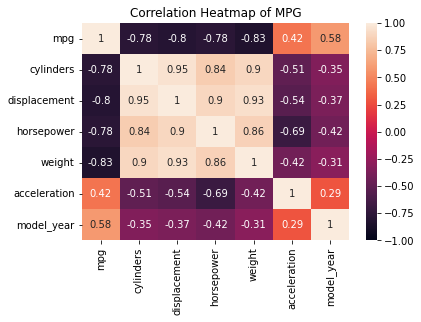

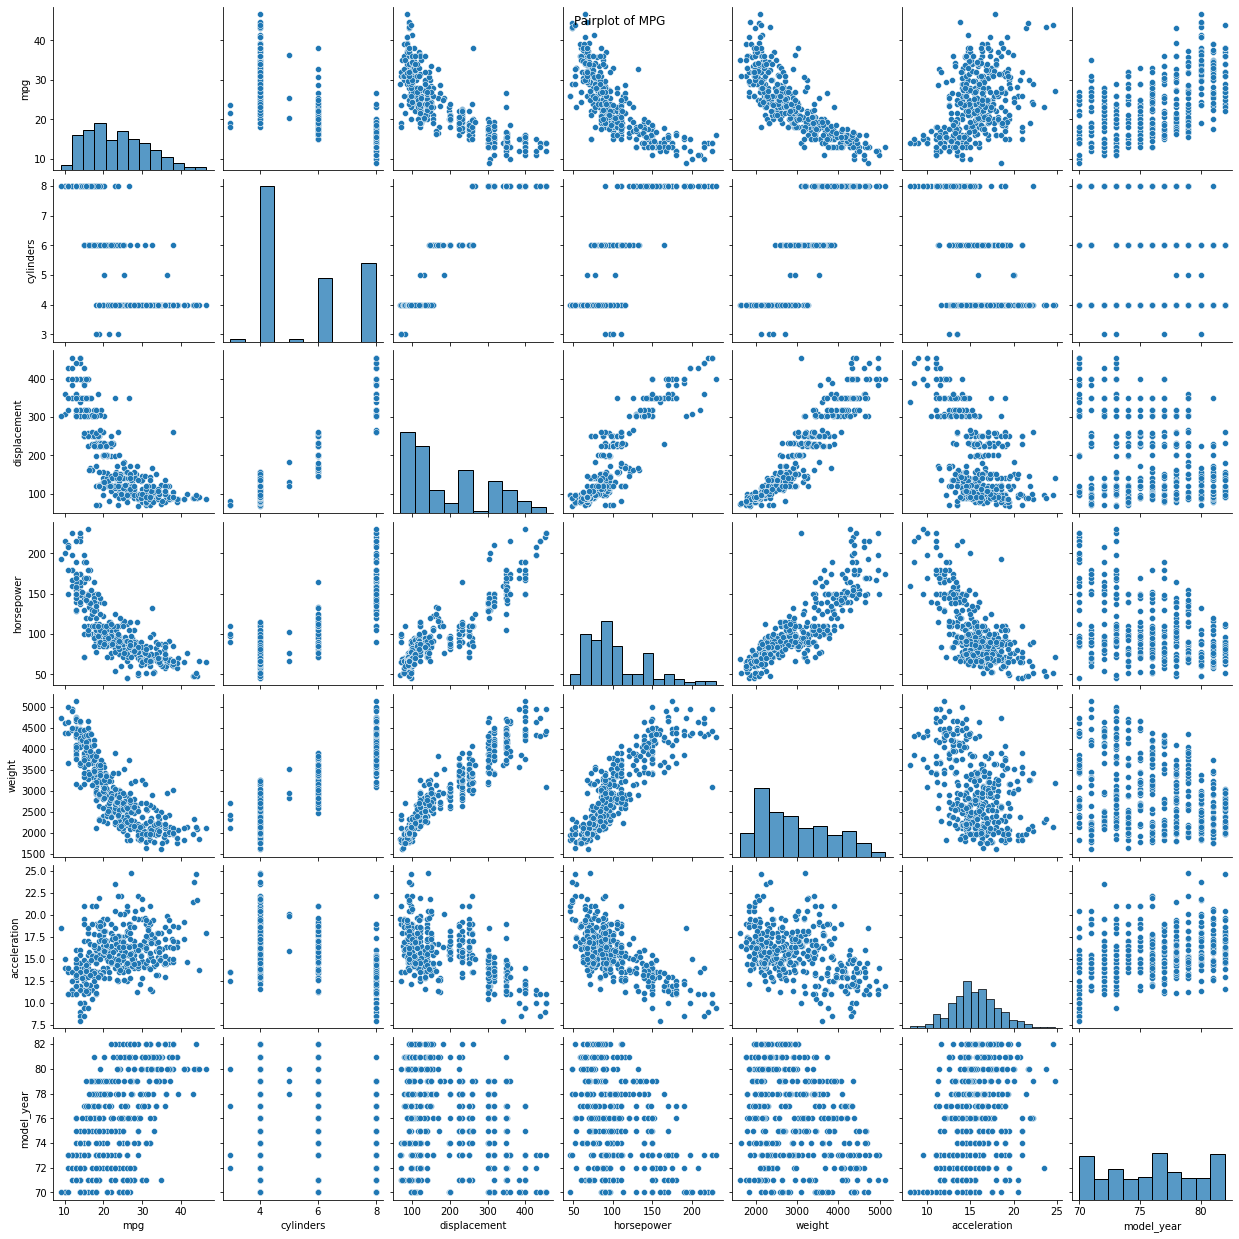

In [2]:
def autompg():
    
    """
    Generates a heatmap of the correlation between numeric columns and a pairplot of the mpg dataset
    """
    mpg = sns.load_dataset('mpg')
    
    #check dataset
#     print(mpg.head())
#     print(mpg.info())
    
    #drop non-numeric columns
    non_num_col = ['origin', 'name']
    mpg_num = mpg.drop(columns = non_num_col)
    
    #print current dataset
#     print(mpg_num.head())
    
    #heatmap of the correlation of all the numeric columns
    sns.heatmap(mpg_num.corr(), cbar=True, annot=True, vmin = -1.0)
    plt.title('Correlation Heatmap of MPG')
    plt.show()
    
    #pairplot
    sns.pairplot(mpg_num)
    plt.suptitle('Pairplot of MPG')
    plt.show()
    
autompg()

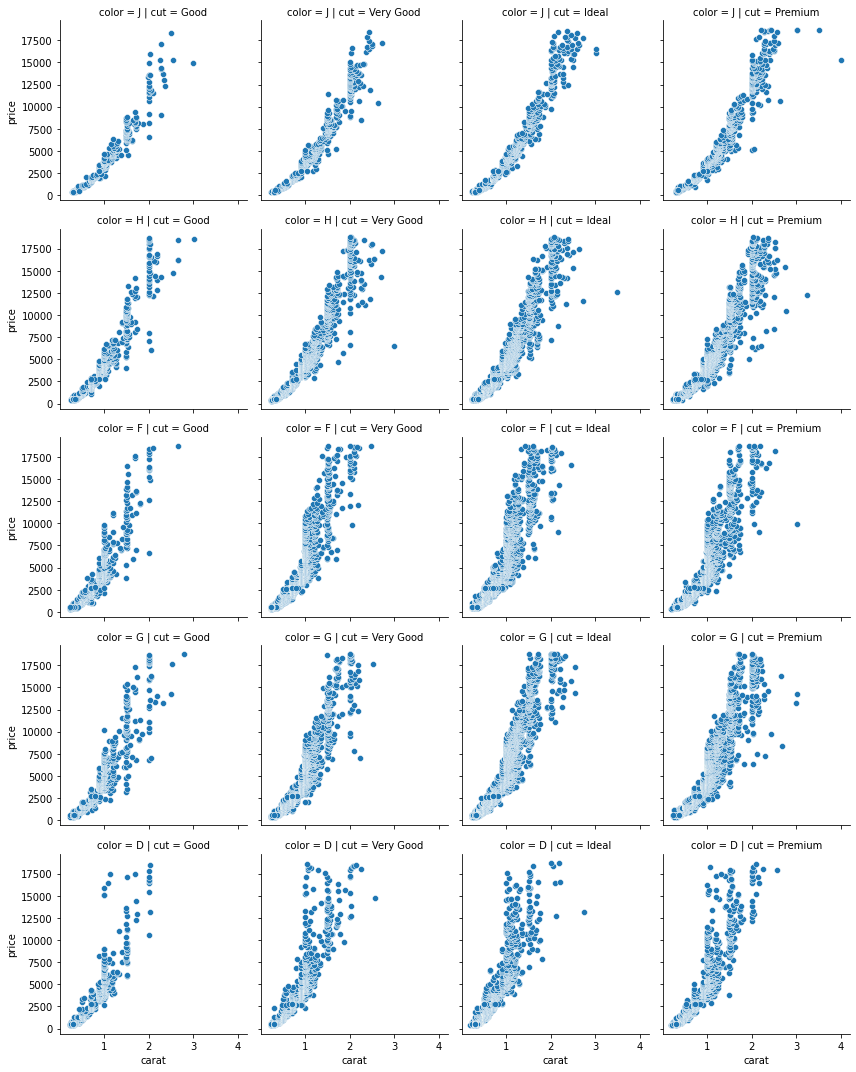

In [3]:
def my_precious(col1,col2):
    """
    Function creates a FacetGrid based on the 'cut' and 'color' of diamonds, then
    eliminates two specified colors and the 'Fair' cut, then plots a scatterplot for price vs. carat
    
    Parameters:
        col1: First color to eliminate
        col2: Second color to eliminate
    """
    diamonds = sns.load_dataset('diamonds')
    
# #         check dataset
#     print(diamonds.head())
#     print(diamonds.info())
    
    #convert data type
    diamonds[['cut','color','clarity']] = diamonds[['cut','color','clarity']].astype('object')
    
    #exclude col1, col2 & fair cut
    diamonds_filter = diamonds[(diamonds['color'] != col1) & (diamonds['color'] != col2) & (diamonds['cut'] != 'Fair')]
    
    #facetgrid for cut and color
    fac = sns.FacetGrid(diamonds_filter, col='cut', row='color')
    
    #scatterplot for price vs carat in facetgrid
    fac.map_dataframe(sns.scatterplot, 'carat', 'price')
    plt.show()

my_precious('E','I')

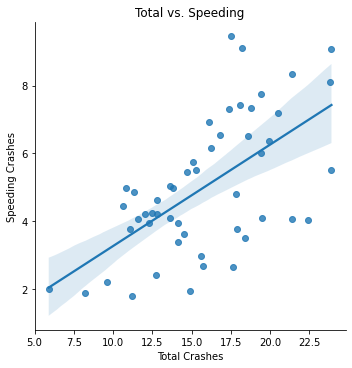

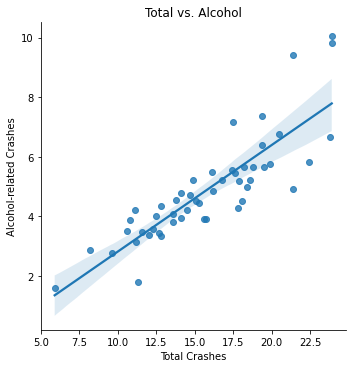

In [4]:
def crashes():
    """
    Function generates scatterplots with linear models for 'total vs. speeding'
    and 'total vs. alcohol' 
    """
    
    car = sns.load_dataset('car_crashes')
    
#     #check dataset
#     print(car.head())
#     print(car.info())

    #scatterplot with linear model for total vs. speeding
    sns.lmplot(x='total', y='speeding', data=car)
    plt.title('Total vs. Speeding')
    plt.xlabel('Total Crashes')
    plt.ylabel('Speeding Crashes')
    plt.show()
    
    #scatterplot with linear model for total vs. alcohol
    sns.lmplot(x='total', y='alcohol', data=car)
    plt.title('Total vs. Alcohol')
    plt.xlabel('Total Crashes')
    plt.ylabel('Alcohol-related Crashes')
    plt.show()
    
crashes()

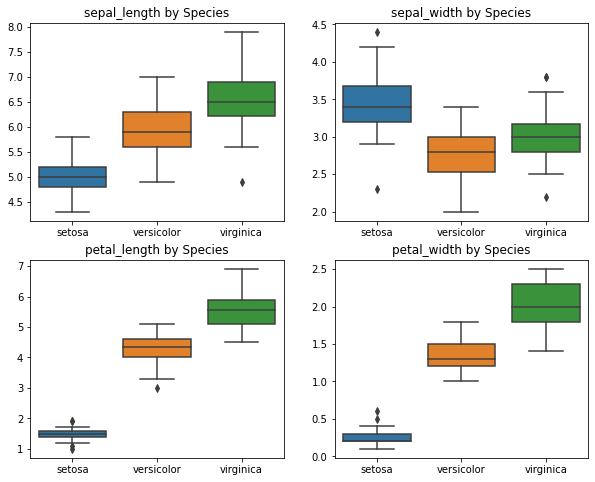

In [5]:
def iris():
    """
    Function generates separate boxplots for each species 
    """
    iris = sns.load_dataset('iris')
    
#     #check dataset
#     print(iris.head())
#     print(iris.info())

    features = list(iris.drop(columns = 'species').columns)
    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10,8))
    
    raxs = axs.ravel()
    
    for idx, ax in enumerate(raxs):
        sns.boxplot(data = iris, x = 'species', y = features[idx], ax = ax)
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_title(f'{features[idx]} by Species')
        
    plt.show()
    
iris()